In [1]:
pip install tensorflow-datasets

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.A4GN6C_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [4]:
class_names = info.features['label'].names
class_names

['cat', 'dog']

In [5]:
for i , example in enumerate(dataset['train']):
  image, label = example
  save_dir ='cats_vs_dogs/train/{}'.format(class_names[label])
  os.makedirs(save_dir, exist_ok=True)

  filename=save_dir + '/' + "{}_{}.jpg".format(class_names[label], i)
  tf.keras.preprocessing.image.save_img(filename, image.numpy())


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential




In [7]:
datagen = ImageDataGenerator(rescale = 1/255 , validation_split=0.2, rotation_range=10,
                             width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.10,
                             horizontal_flip = True)



train_generator = datagen.flow_from_directory(
        '/content/cats_vs_dogs/train',
        target_size=(150, 150),
        batch_size=216,
        class_mode='binary',
        subset='training')

validation_generator = datagen.flow_from_directory(
        '/content/cats_vs_dogs/train',
        target_size=(150, 150),
        batch_size=216,
        class_mode='binary',
        subset='validation')

Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


In [8]:
# prompt: build cnn model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.2),

    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
      train_generator,
      steps_per_epoch=len(train_generator),
      epochs=10,
      validation_data=validation_generator,
      validation_steps=len(validation_generator)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.5901 - loss: 3.6038 - val_accuracy: 0.5498 - val_loss: 0.7057
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.6722 - loss: 0.7605 - val_accuracy: 0.5063 - val_loss: 1.1579
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.7248 - loss: 0.5635 - val_accuracy: 0.5012 - val_loss: 1.7968
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.7563 - loss: 0.5080 - val_accuracy: 0.5840 - val_loss: 1.1884
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.7681 - loss: 0.4831 - val_accuracy: 0.5429 - val_loss: 1.4764
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.7778 - loss: 0.4652 - val_accuracy: 0.5913 - val_loss: 1.2679
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.7953 - loss: 0.4449 - val_accuracy: 0.6837 - val_loss: 0.7659
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.8042 - loss: 0.4234 - val_accuracy: 0.7577 - v

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 74, 74, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 36, 36, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,104,325 (217.84 MB)

 Trainable params: 19,034,625 (72.61 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 38,069,252 (145.22 MB)

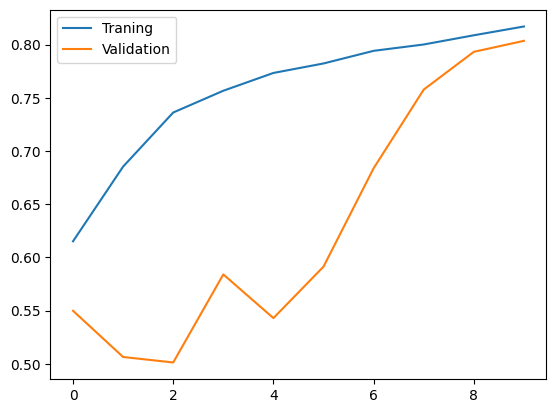

In [11]:
history.history

plt.plot(history.history['accuracy'], label='Traning')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(['Traning','Validation'])



In [12]:
#save model
model.save('cats_vs_dogs.h5')

In [13]:
model_load = tf.keras.models.load_model('cats_vs_dogs.h5')

In [18]:
import requests
from PIL import Image

import numpy as np
import requests
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_and_show_image(img_url, model, class_indices, target_size=(150, 150), threshold=0.5):
    # Load and resize image
    img = Image.open(requests.get(img_url, stream=True).raw).resize(target_size)

    # Preprocess image
    image_array = image.img_to_array(img)
    img_array = np.expand_dims(image_array, axis=0) / 255.0

    # Make prediction
    prediction = model.predict(img_array)

    # For binary classification
    predicted_class_index = int(prediction[0][0] > threshold)

    # Reverse class indices to get label names
    classes = {v: k for k, v in class_indices.items()}
    predicted_class = classes[predicted_class_index]

    # Display the image and prediction
    plt.imshow(image_array.astype("uint8"))
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


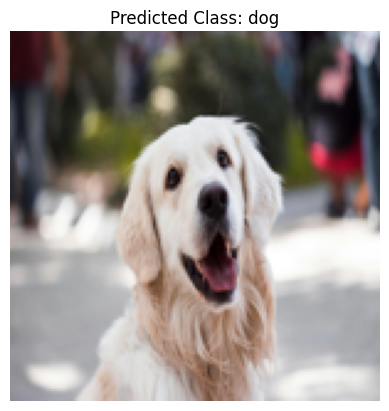

'dog'

In [20]:
img_url1 = 'https://images.pexels.com/photos/1490908/pexels-photo-1490908.jpeg?cs=srgb&dl=pexels-svetozar-milashevich-99573-1490908.jpg&fm=jpg'
predict_and_show_image(img_url1, model, train_generator.class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


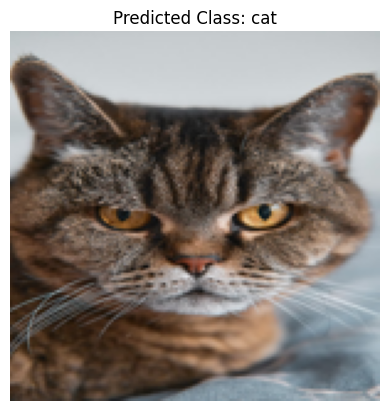

'cat'

In [21]:
img_url2 = 'https://plus.unsplash.com/premium_photo-1667030474693-6d0632f97029?w=600&auto=format&fit=crop&q=60&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y2F0fGVufDB8fDB8fHww'
predict_and_show_image(img_url2, model, train_generator.class_indices)